In [1]:
import requests
from datetime import datetime as time
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

class DataBase:
    
    def __init__(self):
        # to be used if we need to create our own dataframe .csv file!
        self.file_path = ''
        # The clean DataSet that will be used by all users iteration!
        self.clean_DataSet = None
        # When we have to store Data Frames made by collecting info from
        # the following websites APIs.
        self.TMDb = None
        self.IMDb = None
        self.BOMDb = None
        
        # The BoxOffice Dataset from the 90's until April 2020, 
        # WITH release date!
        self.__bo_90_20 = 'dataset_mojo_budget_update_from_1990_until_04_20.csv'
        # The BoxOffice Dataset from all years until 2019,
        # WITHOUT release date!
        self.__bo_all_19 = 'datasets_boxoffice_alltime_until_august_2019.csv'

    

    def BO_DS_cleaning(self):
        
        bo_df = pd.read_csv(self.__bo_90_20)
        bo_df.drop(labels = [
            'trivia','mpaa','run_time','distributor','director',
            'composer','cinematographer','writer','main_actor_1',
            'main_actor_2','main_actor_3','main_actor_4','producer','html'
            ], axis='columns', inplace=True)
        # print('\n')
        # print('raw dataframe')
        # print(bo_df.head(5))
        # print('\n')
        # print('clean dataframe')
        
        bo_df['date'] = bo_df['year'].astype(str) + ' ' + bo_df['release_date']
        cols = bo_df.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        bo_df = bo_df[cols]
        bo_df['budget'] = bo_df['budget']/1000000
        bo_df['date'] = pd.to_datetime(bo_df['date'])
        bo_df.drop(labels = ['year','release_date'], axis='columns', inplace=True)
        # print(bo_df.head(5))
        # print('\n')
        #print(bo_df.tail(5))
        self.clean_DataSet = bo_df
        return self.clean_DataSet

    # # def __DataSet_generator(self):
    # #     if Public TMDb, IMDb and BOMDb exists:
    # #         if Day Date == Today:
    # #             Pandas
    # #             Data Set
    # #     else:
    # #         Call __private_method_TMDb_cleaning.requests()
    # #         Pandas
    # #         DataSet
    # #     pass

    # #private = property(__BOMDb_cleaning)


In [315]:
class Date(DataBase):
    
    
    def __Pandas_filter(self,date = None):
        
        DataBase.BO_DS_cleaning(self)
        df = self.clean_DataSet 
        # print(df)
        # Die Hard 2 release date in U.S.
        default_date = '1990-07-06'
        # this format was the only one that manage to work, link beneath
        date = default_date if date is None else date
        # https://stackoverflow.com/questions/52494128/call-function-without-optional-arguments-if-they-are-none
        try:
            self.date = pd.to_datetime(date)
            # print(df.query("date == @self.date"))
            self.df_filter = df.query("date == @self.date")
            return self.df_filter
        except ValueError:
            print('\nPlease insert a valide date format!\n')

    def __date_input(self,date=None):
        
        
        DataBase.BO_DS_cleaning(self)
        df = self.clean_DataSet 
        while True:
            try:
                date = input("\nWhat date do you want to analize?\nExample: 21 November 2019, or 2019-11-21\n\tType one style here->")
                
                if date == '':
                    date = None
                    self.input_date = date
                    # print('\n DONE None \n')
                    # Exit the loop if success!
                    break
                else: 
                    self.input_date = pd.to_datetime(date)
                    does_it_exist = df.isin([self.input_date]).any().any()
                    # print('\nit cames this far\n')
                    if does_it_exist:
                        self.input_date = pd.to_datetime(date)
                        # print('\n DONE to Date Time \n')
                        # Exit the loop if success!
                        break
                    else:
                        print("\nMaybe this isn't in our database, try some another date in between the 90's and 2020-04-01!\n")
                    # Exit the loop if success!
                    
            except ValueError: 
                print("\nSorry, I didn't understand that.\nExemples of valid formats are:\n21 November 2019 or 2019-11-21\n")
                # let's try again without breaking the code...
                continue
        
        # self.input_date = pd.to_datetime(date)
        self.__Pandas_filter(self.input_date)
        
    def graphic_view(self):
        """
        This is the only public method of the child Class Date()! It
        calls for 'self.__date_input()', which will asks for the users
        input in date format. 
        It'll take the returned values from the methods above and their
        public self.objects and use it to generate a graphic view of the
        results of 'self.__Pandas_filter()' !!!
        """
        self.__date_input()
        
        df_plot_full = self.clean_DataSet
        df_cut = self.df_filter
        
        
        print('\n')
        print('It came this far! Graphic_View!')
        print(df_cut)
        print('\n')
        
        # displaying the graphics of the specific day searched!
        df_cut.plot(kind='bar', x='genre_1', y='budget',figsize=(10, 5)).set_title('This day Budget per Genre in Million', fontsize="15", color="red")
        plt.xlabel('Genre/Title')
        plt.ylabel('Budget')
        plt.show()
        
        # Function that clean/slice '1990-05-25' into '1990-05'
        self.clean_DataSet.iloc[0,0].strftime("%Y-%m")
        def extract_month(month):
            month = month.strftime("%Y-%m-%d")
            clean_month = month[0:7]
            return clean_month
        
        # Droping out NaN values to not run into an error!
        df_plot_full = df_plot_full.dropna(subset=['date', 'genre_1'])
        
        
        # Applying the function to a whole column 'date' and creating a Series from it!
        date_from_full = pd.Series(df_plot_full['date'].apply(extract_month))
        date_from_cut = pd.Series(df_cut['date'].apply(extract_month))
        
        # Inserting the series into our DFs as a new column Month!
        df_plot_full.insert(0, "Month", date_from_full)
        df_cut.insert(0, "Month", date_from_cut)
        
        # Filtering out the main DF with the User DF to create a graphics with only that range of time!
        cut_and_full_df = df_plot_full[df_plot_full.Month.isin(df_cut.Month)]
        cut_and_full_df.plot(kind='bar', x='genre_1', y='budget',figsize=(10, 5)).set_title('This month Budget per Genre in Million', fontsize="15", color="red")
        plt.xlabel('Genre')
        plt.ylabel('Budget in Millions')
        plt.show()
        
        # this input will return which movies were released at the same day¹
        cut_and_full_df = df_plot_full[df_plot_full.Month.isin(df_cut.Month)]
        cut_and_full_df.plot(kind='bar', x='title', y='budget',figsize=(10, 5)).set_title('Movies Budgets', fontsize="15", color="red")
        plt.xlabel('Title')
        plt.ylabel('Budget in Millions')
        plt.show()
        
        
        gen_v = cut_and_full_df["genre_1"].value_counts()
        
        # and a bar graphic highlighting how many 'titles' per 'genre_1' were released at that period.
        #cut_and_full_df.groupby('genre_1')['title'].nunique().plot(kind='bar')
        #plt.show()
        cut_and_full_df.groupby(['genre_1','title']).size().unstack().plot(kind='bar',stacked=True,figsize=(10, 5)).set_title('Genres per Movies', fontsize="15", color="red")
        plt.xlabel('Genre')
        plt.ylabel('Quantity of Movies')
        plt.show()
        print(cut_and_full_df["genre_1"].value_counts())
        
        
        a = df_plot_full['budget'].max()
        z = df_plot_full['budget'].min()
        
        df_plot_full.query("budget == @a or budget == @z").groupby(['title','budget']).size().unstack().plot(kind='bar',stacked=True,figsize=(10, 5)).set_title('Highest and Lowest Budgets 1990-2020', fontsize="15", color="red")
        plt.show()

        
        # Function that clean/slice '1990-05-25' into '1990'
        def extract_year(year):
            year = year.strftime("%Y-%m-%d")
            clean_year = year[0:5]
            return clean_year
        
        # Applying the function to a whole column 'date' and creating a Series from it!
        only_year = pd.Series(df_plot_full['date'].apply(extract_year))
        df_plot_full.insert(0, "year", only_year)
        # print(df_plot_full.groupby('year')['budget'].mean())
        df_plot_full.groupby('year')['budget'].mean().plot(kind='line', x='year', y='budget',figsize=(10, 5)).set_title('Mean of budget invested in movies per year 1990-2020', fontsize="15", color="red")
        plt.show()
        

In [316]:
a = Date()


What date do you want to analize?
Example: 21 November 2019, or 2019-11-21
	Type one style here->2019-11-21


It came this far! Graphic_View!
           date   movie_id       title  budget     domestic  international  \
3236 2019-11-21  tt8688634  21 Bridges    33.0   28539757.0     21400000.0   
3239 2019-11-21  tt8946378  Knives Out    40.0  165363234.0    143869563.0   

        worldwide genre_1 genre_2 genre_3   genre_4  
3236   49939757.0  Action   Crime   Drama  Thriller  
3239  309232797.0  Comedy   Crime   Drama   Mystery  




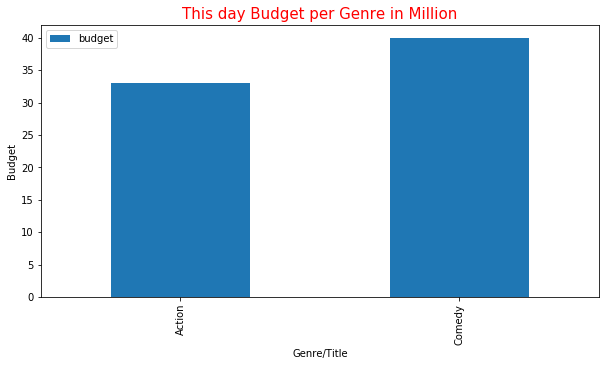

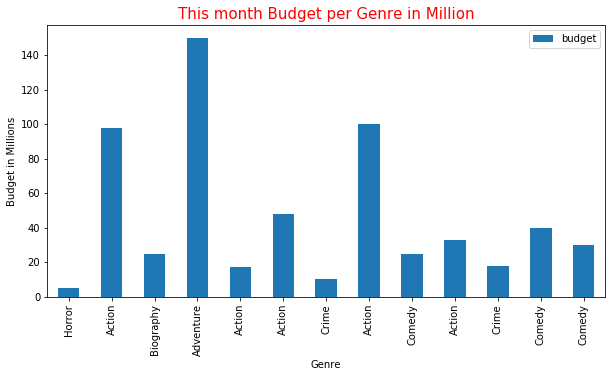

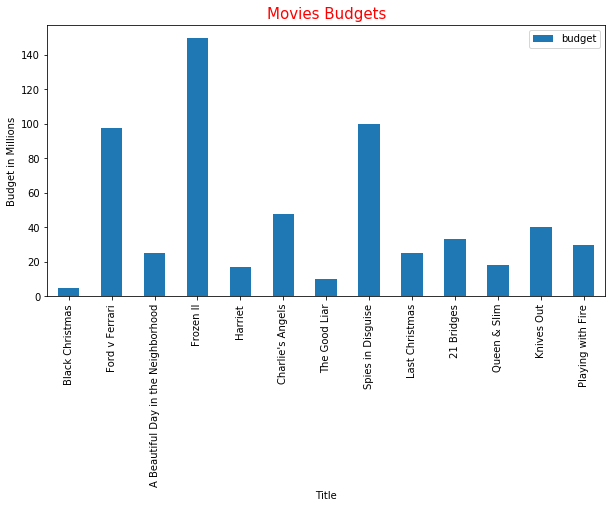

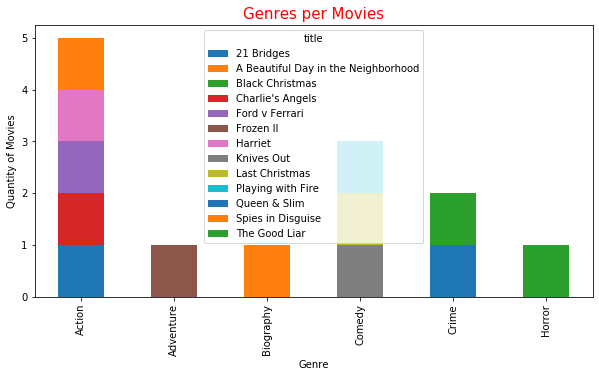

Action       5
Comedy       3
Crime        2
Adventure    1
Horror       1
Biography    1
Name: genre_1, dtype: int64


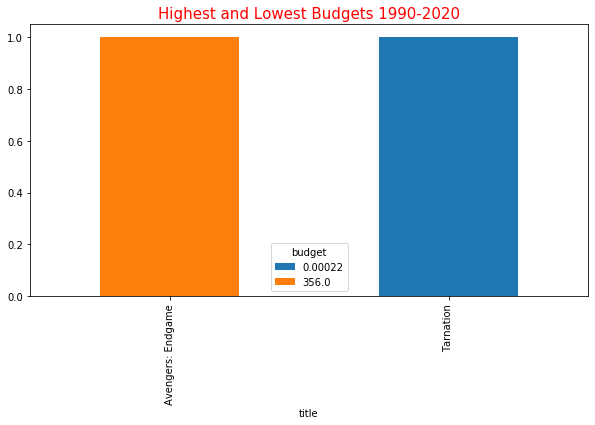

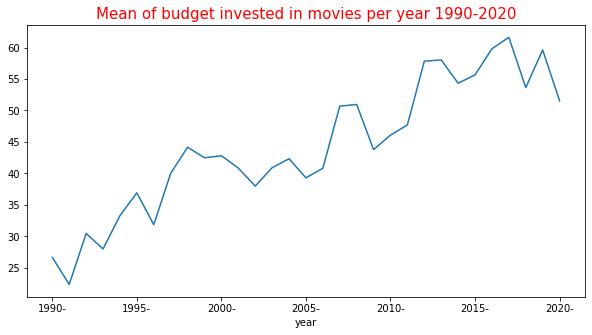

In [317]:
a.graphic_view()

In [ ]:
        #df_cut = self.df_filter.iloc[0,0].strftime("%Y-%m")
        #df_plot_full = self.clean_DataSet.iloc[0,0].strftime("%Y-%m")

In [ ]:
        #df_plot_full.query("budget == @a or budget == @z").plot(kind='scatter', x='title', y='budget',figsize=(10, 5))
        #df_plot_full.query("budget == @a or budget == @z").plot(kind='bar', x='title', y='budget',figsize=(10, 5))
        #plt.yscale("log")
        #plt.show()

In [ ]:
print('\nA and B\n')
        print(a)
        print(z)
        print('\n')
        print(df_plot_full.query("budget == @a or budget == @z"))
        print(type(df_plot_full))